In [1]:
!python --version

Python 3.8.3


## Import Statements

In [1]:
%matplotlib inline
from pydub import AudioSegment
from pydub.playback import play
import IPython.display as ipd
import os
import re
import matplotlib.pyplot as plt

## WAV Duration

In [2]:
wavdir = '/mnt/resource/Tutorial/PhD (Offline)/Resources/Sound Corpus/BracU Speech Data/wavs_clipped_mono_normalized_22.05k'

In [3]:
wav_files = os.listdir(wavdir)
len(wav_files)

10894

In [22]:
dest_dir = '/mnt/resource/Tutorial/PhD (Offline)/Resources/Sound Corpus/BracU Speech Data/wavs_long'

In [23]:
for i, file in enumerate(wav_files):
    src_file = os.path.join(wavdir, file)
    audio = AudioSegment.from_wav(src_file)

    dur = int(audio.duration_seconds)
    
    if dur > 17:
        os.rename(src_file, os.path.join(dest_dir, file))

    #if i == 2: break

In [21]:
long_audio = 0
for i in range(18, 70):
    if i in durations:
        print(f'{i}: {durations[i]}')

        long_audio += durations[i]

print(f'Total long files: {long_audio}')

18: 14
19: 7
20: 10
21: 9
22: 5
23: 8
24: 9
25: 8
26: 2
27: 3
28: 3
29: 6
30: 1
31: 5
32: 4
35: 1
36: 1
37: 2
40: 1
42: 1
64: 1
Total long files: 101


<BarContainer object of 39 artists>

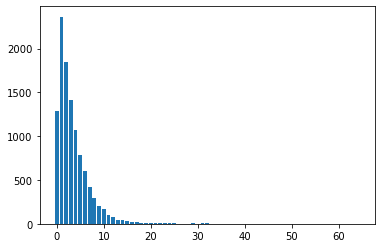

In [18]:
plt.bar(durations.keys(), durations.values())

## Processing New Audios

In [8]:
def detect_leading_silence(sound, silence_threshold=-50.0, chunk_size=10):
    '''
    sound is a pydub.AudioSegment
    silence_threshold in dB
    chunk_size in ms

    iterate over chunks until you find the first one with sound
    '''
    trim_ms = 0 # ms

    assert (chunk_size > 0) # to avoid infinite loop
    while sound[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(sound):
        trim_ms += chunk_size

    if trim_ms > chunk_size: trim_ms -= chunk_size
    if trim_ms > chunk_size: trim_ms -= chunk_size
    return trim_ms

In [9]:
wavdir = '/mnt/resource/Tutorial/PhD (Offline)/Resources/Sound Corpus/BracU Speech Data/wavs_long'
dest_dir = '/mnt/resource/Tutorial/PhD (Offline)/Resources/Sound Corpus/BracU Speech Data/wavs_clipped_mono_normalized_22.05k'

files = os.listdir(wavdir)

for total, file in enumerate(files):
    #if total < 1100: continue
    #if total == 3: break
        
    filename = os.path.join(wavdir,file)
    
    clip = AudioSegment.from_file(filename)
    
    ## Amplitude Normalization Not Needed

    ## Sterio to Mono
    if clip.channels == 2:
        clip.set_channels(1)
        #print(filename)

    ## Silence Remover
    start_trim = detect_leading_silence(clip)
    end_trim = detect_leading_silence(clip.reverse())

    duration = len(clip)    
    trimmed_clip = clip[start_trim:duration-end_trim]

    #play(clip)
    
    clip.export(os.path.join(dest_dir, file), format="wav")
    
    
    
print(f'{total+1} files updated.')

208 files updated.


## Removing Small Files

In [12]:
names = []
with open('/mnt/resource/Etc/Notebooks/notebooks/metadata_normalized.csv') as f:
    for line in f:
        names.append(line.split('|')[0].strip())

len(names)

10702

In [20]:
wavdir = '/mnt/resource/Tutorial/PhD (Offline)/Resources/Sound Corpus/BracU Speech Data/wavs_clipped_mono_normalized_22.05k'

files = os.listdir(wavdir)

total_small_files = 0
for file in files:
    file = file[:-4]
    if file not in names:
        total_small_files += 1
        os.remove(os.path.join(wavdir, file + '.wav'))

print(f'Total {total_small_files} small files to be deleted.')

Total 301 small files to be deleted.


## Sanity Check

In [25]:
names = []
with open('/mnt/resource/Etc/Notebooks/notebooks/metadata_normalized.csv', encoding='utf-8-sig') as f:
    for line in f:
        names.append(line.split('|')[0].strip() + '.wav')

print(len(names))

wavdir = '/mnt/resource/Tutorial/PhD (Offline)/Resources/Sound Corpus/BracU Speech Data/wavs_clipped_mono_normalized_22.05k'

files = os.listdir(wavdir)

print(len(files))

set(names) - set(files)

10701
10701


set()

## Statistics

Total sentences: 10701
Total words: 102388
Total unique words: 18285
Average words per sentence:  9.6
Maximum words in a sentence: 38
Minimum words in a sentence: 1


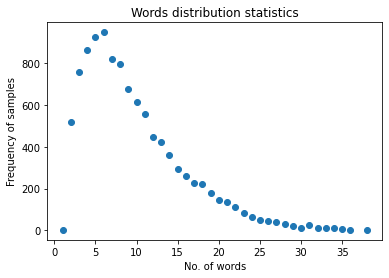

In [49]:
total_files = 0

texts = []
with open('/mnt/resource/Etc/Notebooks/notebooks/metadata_normalized.csv', encoding='utf-8-sig') as f:
    for line in f:
        #print(line)
        texts.append(line.split('|')[2].strip())

total_words = 0
max_words = 0
min_words = 100
avg_words = 0
text_lengths = dict()
unique_words = set()
for i, text in enumerate(texts):
    words = text.split()
    wordset = set()
    for word in words:
        if word is None: continue
        word = word.replace(' ', '').replace(':', '').replace("'", '').replace('"', '').replace('(', '').replace(')', '').replace(',', '').replace(';', '').replace('।', '').replace('?', '').replace('[', '').replace(']', '').replace('!', '')
        #word = re.sub(r"[ :'\"(),;।?\[\]]", '', word)
        wordset.add(word)
        unique_words.add(word)

    n_words = len(wordset)
    total_words += n_words
    max_words = max(max_words, n_words)
    min_words = min(min_words, n_words)
    if n_words in text_lengths:
        text_lengths[n_words] += 1
    else:
        text_lengths[n_words] = 1

    #print(text)
    #print(words)
    #if i == 5: break

print(f'Total sentences: {len(texts)}')
print(f'Total words: {total_words}')
print(f'Total unique words: {len(unique_words)}')
print(f'Average words per sentence: {total_words / len(texts): .2}')
print(f'Maximum words in a sentence: {max_words}')
print(f'Minimum words in a sentence: {min_words}')

fig = plt.figure()
plt.scatter(text_lengths.keys(), text_lengths.values())
plt.title('Words distribution statistics')
plt.xlabel('No. of words')
plt.ylabel('Frequency of samples')


In [13]:
wavdir = '/mnt/resource/Tutorial/PhD (Offline)/Resources/Sound Corpus/BracU Speech Data/wavs_clipped_mono_normalized_22.05k'

files = sorted(os.listdir(wavdir))

texts = []
with open('/mnt/resource/Etc/Notebooks/notebooks/metadata_normalized.csv', encoding='utf-8-sig') as f:
    for line in f:
        idx, _, nrm_txt = line.split('|')
        texts.append((idx, nrm_txt.strip()))
texts = sorted(texts)

total_duration = 0
max_duration = 0
min_duration = 100
avg_duration = 0
words_duration = []

for i, file in enumerate(files):
    audio = AudioSegment.from_wav(os.path.join(wavdir, file))

    total_duration += audio.duration_seconds
    max_duration = max(max_duration, audio.duration_seconds)
    min_duration = min(min_duration, audio.duration_seconds)

    words = texts[i][1].split()
    wordset = set()
    for word in words:
        if word is None: continue
        word = word.replace(' ', '').replace(':', '').replace("'", '').replace('"', '').replace('(', '').replace(')', '').replace(',', '').replace(';', '').replace('।', '').replace('?', '').replace('[', '').replace(']', '').replace('!', '')
        wordset.add(word)

    words_duration.append((len(wordset), audio.duration_seconds))

avg_duration = total_duration / len(files)
total_duration /= 60 # sec. to min.
duration_hours = total_duration // 60
duration_mins = total_duration - (duration_hours * 60)

print(f"Total duration: {int(duration_hours)} hours {duration_mins:.2f} minutes")
print(f'Maximum duration: {max_duration:.2f} seconds')
print(f'Minimum duration: {min_duration:.2f} seconds')
print(f'Average duration: {avg_duration:.2f} seconds')

Total duration: 11 hours 5.9e+01 minutes
Maximum duration: 19.32 seconds
Minimum duration: 0.27 seconds
Average duration: 4.03 seconds


Text(0, 0.5, 'Duration of samples')

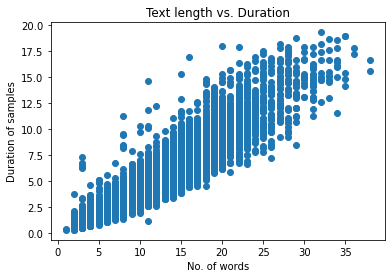

In [14]:
x, y = zip(*words_duration)
plt.scatter(x, y)
plt.title('Text length vs. Duration')
plt.xlabel('No. of words')
plt.ylabel('Duration of samples')